In [2]:
# data wrangling and linear algebra
import pandas as pd
import numpy as np

# data visualisation
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import matplotlib

# metrics
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

# yahoo finance api
import yfinance as yf

# statistical tests
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller

# framework
import tensorflow as tf
from tensorflow.keras import layers, models

# misc
import warnings
import os


warnings.filterwarnings(action='ignore')
pd.set_option('display.max_rows',500)
matplotlib.rcParams['figure.figsize']  = (12,8)

In [3]:
# get microsoft stock data
msft = yf.Ticker('MSFT')

# get stock info
msft.info

{'zip': '98052',
 'sector': 'Technology',
 'fullTimeEmployees': 163000,
 'longBusinessSummary': 'Microsoft Corporation develops, licenses, and supports software, services, devices, and solutions worldwide. Its Productivity and Business Processes segment offers Office, Exchange, SharePoint, Microsoft Teams, Office 365 Security and Compliance, and Skype for Business, as well as related Client Access Licenses (CAL); Skype, Outlook.com, and OneDrive; LinkedIn that includes Talent, Learning, Sales, and Marketing solutions, as well as premium subscriptions; and Dynamics 365, a set of cloud-based and on-premises business solutions for small and medium businesses, large organizations, and divisions of enterprises. Its Intelligent Cloud segment licenses SQL and Windows Servers, Visual Studio, System Center, and related CALs; GitHub that provides a collaboration platform and code hosting service for developers; and Azure, a cloud platform. It also offers support services and Microsoft consulting

In [4]:
# get historical market data
hist = msft.history(start = '2010-08-01', end = '2020-07-31', period = '1d')
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-08-02,20.53,20.84,20.34,20.80,55044600,0.0,0
2010-08-03,20.70,20.82,20.52,20.67,56877700,0.0,0
2010-08-04,20.66,20.73,20.10,20.33,78531900,0.0,0
2010-08-05,20.14,20.21,19.92,20.04,64922100,0.0,0
2010-08-06,19.89,20.19,19.77,20.18,55982100,0.0,0
...,...,...,...,...,...,...,...
2020-07-24,200.42,202.86,197.51,201.30,39827000,0.0,0
2020-07-27,201.47,203.97,200.86,203.85,30160900,0.0,0
2020-07-28,203.61,204.70,201.74,202.02,23251400,0.0,0


Training Shape:  2201
Validation Shape: 317


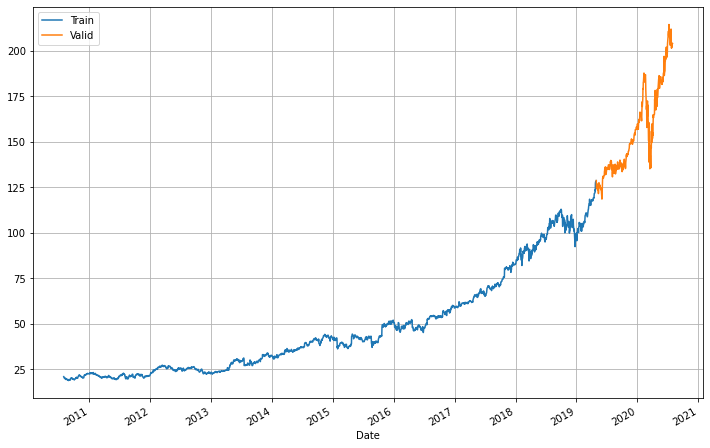

In [24]:
#splitting

split_time = '2019-04-30'
train = hist.loc[:split_time]
val = hist.loc[split_time:]

print('Training Shape: ', train.shape[0])
print('Validation Shape:', val.shape[0])

pd.concat([train['Close'], val['Close']], axis = 1).plot(grid = True)
plt.legend(['Train', 'Valid'])
plt.show()

# Baseline
    

<b> Simple moving Average

In [6]:
def Calculate_SMA(df, col, moving_average):
    """
    Calculates simple moving averages and appends to the series data frame.
    
    :param df: dataframe containing the time series (pandas dataframe)
    :parma col: the column for which moving averages to be calculated (str)
    :param moving_average: moving average windows (list of integers)
    
    returns: dataframe with moving averages computed
    """
    df = df.copy()
    for ma in moving_average:
        df[str(ma)+'MA'] = df[col].rolling(window = ma).mean().shift()
    
    return df
    

In [7]:
prices = hist[['Close']]
prices = Calculate_SMA(prices, 'Close', [10, 30, 50])
prices.head(500)

,Close,10MA,30MA,50MA
Date,,,,
2010-08-02,20.80,NaN,NaN,NaN
2010-08-03,20.67,NaN,NaN,NaN
2010-08-04,20.33,NaN,NaN,NaN
2010-08-05,20.04,NaN,NaN,NaN
2010-08-06,20.18,NaN,NaN,NaN
2010-08-09,20.23,NaN,NaN,NaN
2010-08-10,19.80,NaN,NaN,NaN
2010-08-11,19.64,NaN,NaN,NaN
2010-08-12,19.35,NaN,NaN,NaN


In [8]:
def get_forecast(df, col, split_time):
    '''
    Returns the forecast using moving averages
    
    :param df: Data frame storing the SMA values
    :param col: The Moving average column based on which forecast will be made
    :split_time: The time of splitting into vaidation set
    
    returns forecasted values (pandas series)
    '''
    df = df.copy()
    forecast = df[col].loc[split_time: ]
    
    return forecast

In [9]:
# prediction
val['forecast_10MA'] = get_forecast(prices, '10MA', split_time)
val['forecast_30MA'] = get_forecast(prices, '30MA', split_time)
val['forecast_50MA'] = get_forecast(prices, '50MA', split_time)

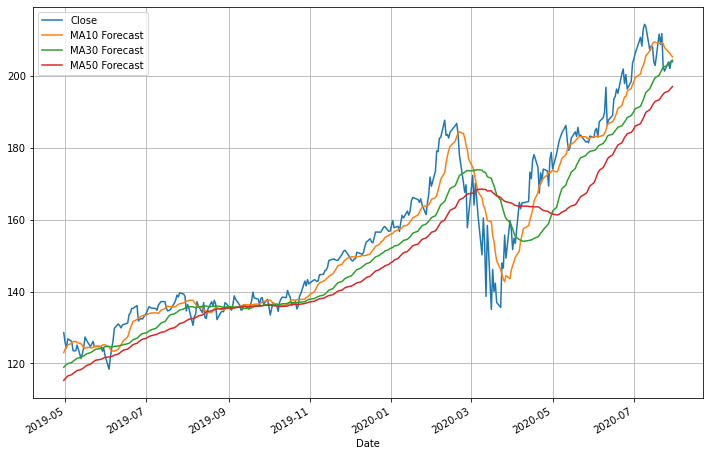

In [10]:
# plotting
val[['Close', 'forecast_10MA', 'forecast_30MA', 'forecast_50MA']].plot(grid = True)
plt.legend(['Close', 'MA10 Forecast', 'MA30 Forecast', 'MA50 Forecast'])
plt.show()

In [11]:
# metrics
def get_metrics(df, true_col, pred_cols):
    """
    Calculates RMSE & MAE for the forecasted values
    
    :param df: Dataframe containing the true and forecasted values
    :parma true_col: Column with the true values
    :param pred_cols: Columns with the forecasted values (list of integers)
    
    returns 2 dictionaries with column name as key and RMSE/MAE as values
    """
    RMSE = {}
    MAE = {}
    for pred_col in pred_cols:
        rmse =  metrics.mean_squared_error(df[true_col].values, df[pred_col].values, squared = False)
        mae = metrics.mean_absolute_error(df[true_col].values, df[pred_col].values)
        RMSE[pred_col] = rmse
        MAE[pred_col] = mae
        
        print(f'RMSE for {pred_col} = {rmse}\n')
        print(f'MAE for {pred_col} = {mae}\n')
        
    return RMSE, MAE

In [12]:
sma_rmse, sma_mae = get_metrics(val, 'Close', ['forecast_10MA', 'forecast_30MA', 'forecast_50MA'])


RMSE for forecast_10MA = 5.450122989958892

MAE for forecast_10MA = 3.7980946372240023

RMSE for forecast_30MA = 9.553395499393007

MAE for forecast_30MA = 7.143508937959989

RMSE for forecast_50MA = 11.588554466551305

MAE for forecast_50MA = 9.345664984227076



10 Day Simple Moving Average performs best here with root mean square error 5.4 and MAE is 3.7

<b> Exponential Moving Average

In [671]:
def Calculate_EMA(df, col, exp_moving_average, alpha = 0.7):
    """
    Calculates exponential moving averages and appends to the series data frame.
    
    :param df: dataframe containing the time series (pandas dataframe)
    :parma col: the column for which moving averages to be calculated (str)
    :param moving_average: moving average windows (list of integers)
    
    returns: dataframe with moving averages computed
    """
    df = df.copy()
    for ema in exp_moving_average:
        df[str(ema)+'EMA'] = df[col].ewm(min_periods = ema, alpha = alpha, adjust = False).mean().shift(1)
    
    return df
    

In [672]:
prices = Calculate_EMA(prices, 'Close', [10, 30, 50, 100], alpha = 0.7)

In [673]:
# prediction
val['forecast_10EMA'] = get_forecast(prices, '10EMA', split_time)
val['forecast_30EMA'] = get_forecast(prices, '30EMA', split_time)
val['forecast_50EMA'] = get_forecast(prices, '50EMA', split_time)
val['forecast_100EMA'] = get_forecast(prices, '100EMA', split_time)

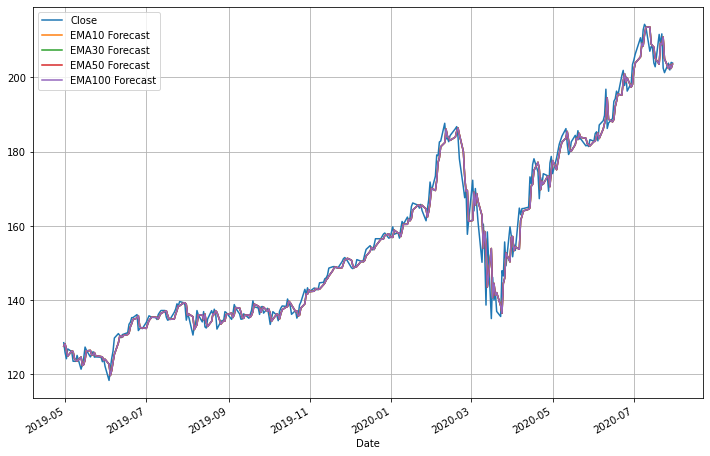

In [674]:
# plotting
val[['Close', 'forecast_10EMA', 'forecast_30EMA', 'forecast_50EMA', 'forecast_100EMA']].plot(grid = True)
plt.legend(['Close', 'EMA10 Forecast', 'EMA30 Forecast', 'EMA50 Forecast', 'EMA100 Forecast'])
plt.show()

In [675]:
ema_rmse, ema_mae = get_metrics(val, 'Close', ['forecast_10EMA', 'forecast_30EMA', 'forecast_50EMA', 'forecast_100EMA'])

RMSE for forecast_10EMA = 3.47617522487891

MAE for forecast_10EMA = 2.2708441391348644

RMSE for forecast_30EMA = 3.47617522487891

MAE for forecast_30EMA = 2.2708441391348644

RMSE for forecast_50EMA = 3.47617522487891

MAE for forecast_50EMA = 2.2708441391348644

RMSE for forecast_100EMA = 3.47617522487891

MAE for forecast_100EMA = 2.2708441391348644



RMSE of 3.47, 2.27 MAE across all EMA values. Much better the Simple moving averages. We will use this as the baseline model.

# Deep Neural Networks - 3 layer NN

In [15]:
# create training dataset

def create_dataset(series, window_size, batch_size, shuffle_buffer, scaler = None):
    
    """
    Creates windowed dataset, data from time step t:t+window_size is input X and the next value is output y
    
    :params series: the series for which dataset to be created (numpy array)
    :params window_size: window size of each input X
    :params batch_size: batch size for training
    :params shuffle_buffer: buffer parameter for shuffling the data in tf shuffle API
    :params scaler: scaling function
    
    returns generator object to generate input X, output y (arrays)
    """
    if scaler!=None:
        
        series = scaler.fit_transform(series.values.reshape(-1,1))
    
    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size+1, shift = 1, drop_remainder = True)
    dataset = dataset.flat_map(lambda window: window.batch(window_size+1))
    dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
    dataset = dataset.batch(batch_size).prefetch(1)
    
    return dataset
    

In [677]:
# initialize parameters
window_size = 30
batch_size = 32
shuffle_buffer = 1000

In [678]:
# initialize dataset
dataset = create_dataset(train['Close'], window_size = window_size, batch_size = batch_size, shuffle_buffer = shuffle_buffer)

# create model
model = models.Sequential([
    layers.Dense(100, input_shape = [window_size], activation = 'relu'),    
    layers.Dense(100, activation = 'relu'),       
    layers.Dense(100, activation = 'relu'),
    layers.Dense(1)
])

# callbacks
lr_callback = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))


optimizer = tf.keras.optimizers.SGD(learning_rate = 0.01, momentum=0.9)
model.compile(loss = 'mse', optimizer = optimizer)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 100)               3100      
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 101       
Total params: 23,401
Trainable params: 23,401
Non-trainable params: 0
_________________________________________________________________


In [20]:
history = model.fit(dataset, epochs = 100, callbacks = [lr_callback], verbose = 1)

Epoch 1/100
68/68 [==============================] - 1s 10ms/step - loss: 1197.6616 - lr: 1.0000e-08
Epoch 2/100
68/68 [==============================] - 1s 9ms/step - loss: 42.3220 - lr: 1.1220e-08
Epoch 3/100
68/68 [==============================] - 1s 11ms/step - loss: 2.9210 - lr: 1.2589e-08
Epoch 4/100
68/68 [==============================] - 1s 9ms/step - loss: 2.4323 - lr: 1.4125e-08
Epoch 5/100
68/68 [==============================] - 0s 6ms/step - loss: 2.3850 - lr: 1.5849e-08
Epoch 6/100
68/68 [==============================] - 1s 9ms/step - loss: 2.3451 - lr: 1.7783e-08
Epoch 7/100
68/68 [==============================] - 1s 11ms/step - loss: 2.3154 - lr: 1.9953e-08
Epoch 8/100
68/68 [==============================] - 1s 11ms/step - loss: 2.2962 - lr: 2.2387e-08
Epoch 9/100
68/68 [==============================] - 1s 9ms/step - loss: 2.2877 - lr: 2.5119e-08
Epoch 10/100
68/68 [==============================] - 1s 8ms/step - loss: 2.2692 - lr: 2.8184e-08
Epoch 11/100
68/68 [=

Epoch 84/100
68/68 [==============================] - 1s 14ms/step - loss: 762.2173 - lr: 1.4125e-04
Epoch 85/100
68/68 [==============================] - 1s 12ms/step - loss: 729.0436 - lr: 1.5849e-04
Epoch 86/100
68/68 [==============================] - 1s 11ms/step - loss: 700.0181 - lr: 1.7783e-04
Epoch 87/100
68/68 [==============================] - 1s 8ms/step - loss: 737.2568 - lr: 1.9953e-04
Epoch 88/100
68/68 [==============================] - 1s 11ms/step - loss: 733.0763 - lr: 2.2387e-04
Epoch 89/100
68/68 [==============================] - 1s 8ms/step - loss: 738.3268 - lr: 2.5119e-04
Epoch 90/100
68/68 [==============================] - 1s 10ms/step - loss: 768.1508 - lr: 2.8184e-04
Epoch 91/100
68/68 [==============================] - 1s 11ms/step - loss: 761.6285 - lr: 3.1623e-04
Epoch 92/100
68/68 [==============================] - 1s 11ms/step - loss: 737.9341 - lr: 3.5481e-04
Epoch 93/100
68/68 [==============================] - 1s 9ms/step - loss: 726.5443 - lr: 3.98

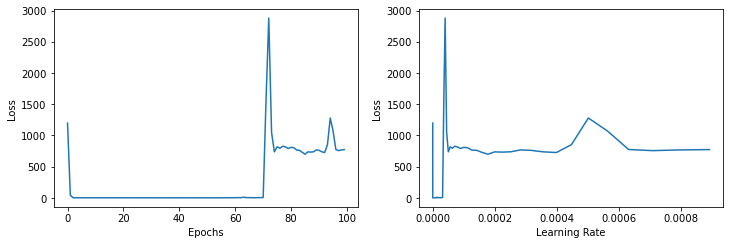

In [21]:
# training loss visualisation
plt.subplot(221)
plt.plot(history.history['loss'], label = 'Train Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')

# plotting learning rate vs loss
plt.subplot(222)
plt.plot(history.history['lr'], history.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')

plt.show()

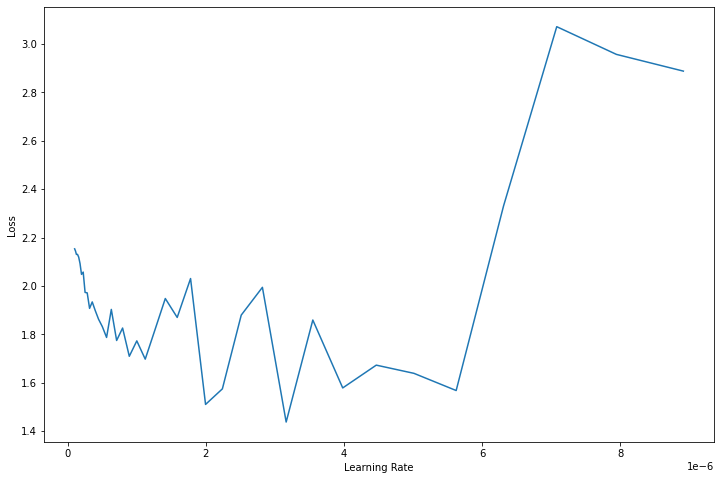

In [22]:
# zoom in on the loss vs lr
plt.plot(history.history['lr'][20:60], history.history['loss'][20:60])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.show()

In [570]:
tf.keras.backend.clear_session()

# initialize dataset
dataset = create_dataset(train['Close'], window_size = window_size, batch_size = batch_size, shuffle_buffer = shuffle_buffer)

# create model
model = models.Sequential([
    layers.Dense(50, input_shape = [window_size], activation = 'relu'),
    layers.Dense(50, activation = 'relu'),
    layers.Dense(1)
])

# learning rate schedule
initial_learning_rate = 6e-6
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True)


optimizer = tf.keras.optimizers.SGD(learning_rate = lr_schedule, momentum = 0.9)
model.compile(loss = 'mse', optimizer = optimizer)


history = model.fit(dataset, epochs = 200, verbose = 1, shuffle = False)

Epoch 1/200
136/136 [==============================] - 0s 2ms/step - loss: 12.5560
Epoch 2/200
136/136 [==============================] - 0s 2ms/step - loss: 3.0848
Epoch 3/200
136/136 [==============================] - 0s 2ms/step - loss: 3.0342
Epoch 4/200
136/136 [==============================] - 0s 2ms/step - loss: 2.3549
Epoch 5/200
136/136 [==============================] - 0s 2ms/step - loss: 2.1437
Epoch 6/200
136/136 [==============================] - 0s 2ms/step - loss: 1.9754
Epoch 7/200
136/136 [==============================] - 0s 2ms/step - loss: 1.9417
Epoch 8/200
136/136 [==============================] - 0s 2ms/step - loss: 2.5761
Epoch 9/200
136/136 [==============================] - 0s 2ms/step - loss: 2.3112
Epoch 10/200
136/136 [==============================] - 0s 2ms/step - loss: 1.5891
Epoch 11/200
136/136 [==============================] - 0s 2ms/step - loss: 1.5000
Epoch 12/200
136/136 [==============================] - 0s 2ms/step - loss: 2.3097
Epoch 13/200

136/136 [==============================] - 0s 2ms/step - loss: 0.9899
Epoch 197/200
136/136 [==============================] - 0s 2ms/step - loss: 0.8730
Epoch 198/200
136/136 [==============================] - 0s 2ms/step - loss: 1.0828
Epoch 199/200
136/136 [==============================] - 0s 2ms/step - loss: 0.9638
Epoch 200/200
136/136 [==============================] - 0s 3ms/step - loss: 0.8251


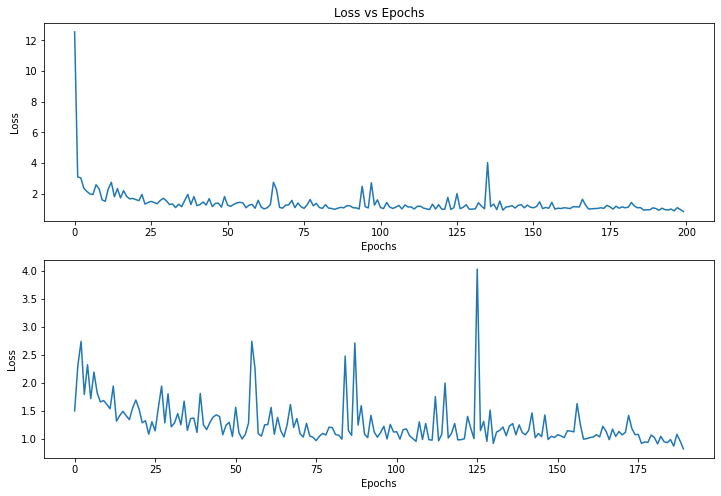

In [571]:
# plotting loss
plt.subplot(211)
plt.title('Loss vs Epochs')
plt.plot(history.history['loss'], label = 'Train Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')

# zooming in
plt.subplot(212)
plt.plot(history.history['loss'][10:], label = 'Train Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

The loss has become almost constant after 300 epochs.

In [14]:
# creating forecast

def get_forecast(model, series, path = "", scaler = None):
    """
    Creates forecast using trained neural network
    
    :params model: The trained model
    :param series: The series on which forcast is to be made (numpy array)
    :param path: Path of the saved model
    :param scaler: Scaler to get back values in original scale
    
    returns forecast (array)
    """
    
    forecast = []
    
    if os.path.exists(path):
        model = models.load_model(path)
    else:
        pass
    
    
    for time in range(len(series) - window_size):
        forecast.append(model.predict(series[time:time+window_size][np.newaxis]))
    
    # split time is a date so we did split_time+1: for getting validation set
    forecast = np.array(forecast[len(train) - window_size - 1:])[:,0,0]
    
    if scaler!=None:
        forecast = scaler.inverse_transform(forecast.reshape(-1,1))
    
    return forecast
        

In [681]:
forecast = get_forecast(model, prices['Close'].values, path = 'models/NN-50-50_lr6e-6')
val['forecast_NN-50-50'] = forecast

In [682]:
# metric
NN_rmse, NN_mae = get_metrics(val, 'Close', ['forecast_NN-50-50']) # BS 32 SGD window 30

RMSE for forecast_NN-50-50 = 3.613082012826069

MAE for forecast_NN-50-50 = 2.401642338605333



In [33]:
val.drop('forecast_NN-50-50-10', axis = 1, inplace = True)

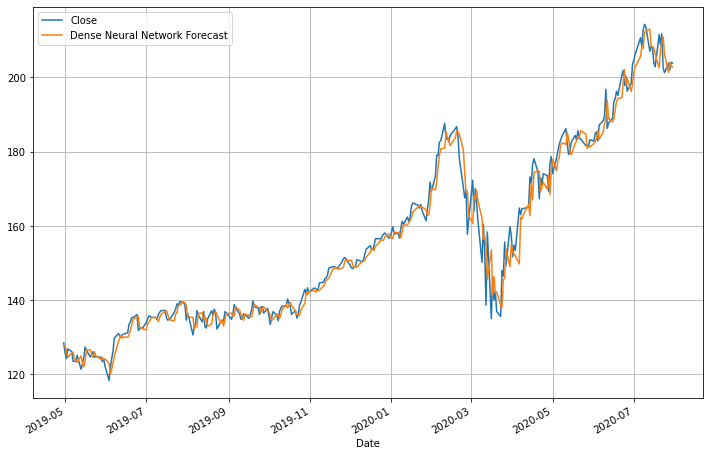

In [34]:
# plotting
val[['Close', 'forecast_NN-50-50']].plot(grid = True)
plt.legend(['Close', 'Dense Neural Network Forecast'])
plt.show()

In [35]:
# saving the model
model.save('models/NN-50-50_lr6e-6')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: models/NN-50-50_lr6e-6\assets


# LSTM

<b> Single Unit

In [770]:
# params
batch_size = 32
window_size = 30

In [771]:
tf.keras.backend.clear_session()

# initialize dataset
dataset = create_dataset(train['Close'], window_size = window_size, batch_size = batch_size, shuffle_buffer = shuffle_buffer)

# create model
model = models.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x, axis = -1), input_shape = [None]),
    layers.LSTM(128),
    layers.Dense(50, activation = 'relu'),
    layers.Dense(20, activation = 'relu'),
    layers.Dense(1),
    layers.Lambda(lambda x: x*100)
])


# callbacks to search learning rate
lr_callback = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))


optimizer = tf.keras.optimizers.SGD(learning_rate = 0.01, momentum=0.9)
model.compile(loss = 'mse', optimizer = optimizer)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda (Lambda)              (None, None, 1)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 128)               66560     
_________________________________________________________________
dense (Dense)                (None, 50)                6450      
_________________________________________________________________
dense_1 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 21        
_________________________________________________________________
lambda_1 (Lambda)            (None, 1)                 0         
Total params: 74,051
Trainable params: 74,051
Non-trainable params: 0
____________________________________________________

In [772]:
history = model.fit(dataset, epochs = 100, callbacks = [lr_callback], verbose = 1)

Epoch 1/100
68/68 [==============================] - 1s 12ms/step - loss: 93.3378 - lr: 1.0000e-08
Epoch 2/100
68/68 [==============================] - 1s 14ms/step - loss: 25.0835 - lr: 1.1220e-08
Epoch 3/100
68/68 [==============================] - 1s 13ms/step - loss: 11.0676 - lr: 1.2589e-08
Epoch 4/100
68/68 [==============================] - 1s 12ms/step - loss: 6.9422 - lr: 1.4125e-08
Epoch 5/100
68/68 [==============================] - 1s 10ms/step - loss: 4.9814 - lr: 1.5849e-08
Epoch 6/100
68/68 [==============================] - 1s 10ms/step - loss: 3.9994 - lr: 1.7783e-08
Epoch 7/100
68/68 [==============================] - 1s 13ms/step - loss: 3.3420 - lr: 1.9953e-08
Epoch 8/100
68/68 [==============================] - 1s 13ms/step - loss: 2.7720 - lr: 2.2387e-08
Epoch 9/100
68/68 [==============================] - 1s 11ms/step - loss: 2.4960 - lr: 2.5119e-08
Epoch 10/100
68/68 [==============================] - 1s 12ms/step - loss: 2.2337 - lr: 2.8184e-08
Epoch 11/100
68/

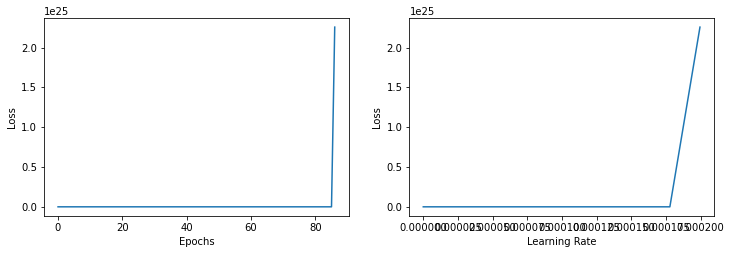

In [773]:
# training loss visualisation
plt.subplot(221)
plt.plot(history.history['loss'], label = 'Train Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')

# plotting learning rate vs loss
plt.subplot(222)
plt.plot(history.history['lr'], history.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')

plt.show()

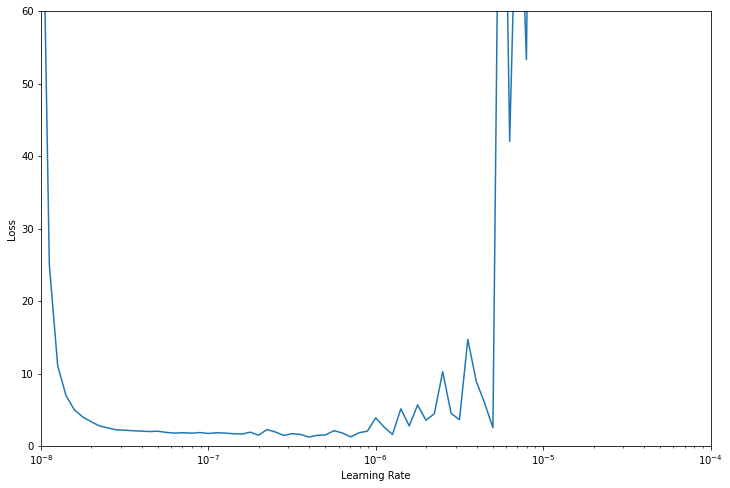

In [778]:
# zoom in on the loss vs lr
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-8, 1e-4, 0, 60])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.show()

In [784]:
# params
batch_size = 32
window_size = 50

In [789]:
tf.keras.backend.clear_session()

# create model
model = models.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x, axis = -1), input_shape = [None]),
    layers.LSTM(128),
    layers.Dense(50, activation = 'relu'),   
    layers.Dense(1),
    layers.Lambda(lambda x: x*150)
])

# initialize dataset
dataset = create_dataset(train['Close'], window_size = window_size, batch_size = batch_size, shuffle_buffer = shuffle_buffer)

#optimizer = tf.keras.optimizers.SGD(learning_rate = 0.5e-6, momentum=0.9)
optimizer = tf.keras.optimizers.Adam(lr = 0.001)
model.compile(loss = 'mse', optimizer = optimizer)
history = model.fit(dataset, epochs = 200, verbose = 1)

Epoch 1/200
68/68 [==============================] - 1s 12ms/step - loss: 358.9531
Epoch 2/200
68/68 [==============================] - 1s 13ms/step - loss: 4.2617
Epoch 3/200
68/68 [==============================] - 1s 14ms/step - loss: 1.8241
Epoch 4/200
68/68 [==============================] - 1s 13ms/step - loss: 1.6136
Epoch 5/200
68/68 [==============================] - 1s 11ms/step - loss: 1.3090
Epoch 6/200
68/68 [==============================] - 1s 12ms/step - loss: 1.1264
Epoch 7/200
68/68 [==============================] - 1s 12ms/step - loss: 1.2467
Epoch 8/200
68/68 [==============================] - 1s 10ms/step - loss: 1.0904
Epoch 9/200
68/68 [==============================] - 1s 9ms/step - loss: 1.6279
Epoch 10/200
68/68 [==============================] - 1s 11ms/step - loss: 1.3441
Epoch 11/200
68/68 [==============================] - 1s 9ms/step - loss: 1.0769
Epoch 12/200
68/68 [==============================] - 1s 14ms/step - loss: 1.3745
Epoch 13/200
68/68 [=====

68/68 [==============================] - 1s 14ms/step - loss: 0.8592
Epoch 199/200
68/68 [==============================] - 1s 12ms/step - loss: 1.4463
Epoch 200/200
68/68 [==============================] - 1s 12ms/step - loss: 1.1830


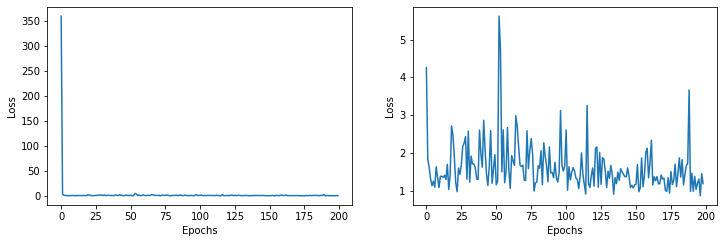

In [790]:
# training loss visualisation
plt.subplot(221)
plt.plot(history.history['loss'], label = 'Train Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')

# zoomed version
plt.subplot(222)
plt.plot(history.history['loss'][1:], label = 'Train Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')

plt.show()

After 150 epochs the results are moslty consistent

In [791]:
forecast = get_forecast(model, prices['Close'].values)
val['LSTM'] = forecast

In [792]:
LSTM1_rmse, LSTM1_mae = get_metrics(val, 'Close', ['LSTM'])

RMSE for LSTM = 22.387092956331244

MAE for LSTM = 16.650714960429195



<b> Stacked LSTM

In [582]:
# scaling data
scaler = MinMaxScaler()
hist['Close_scaled'] = scaler.fit_transform(hist['Close'].values.reshape(-1,1))


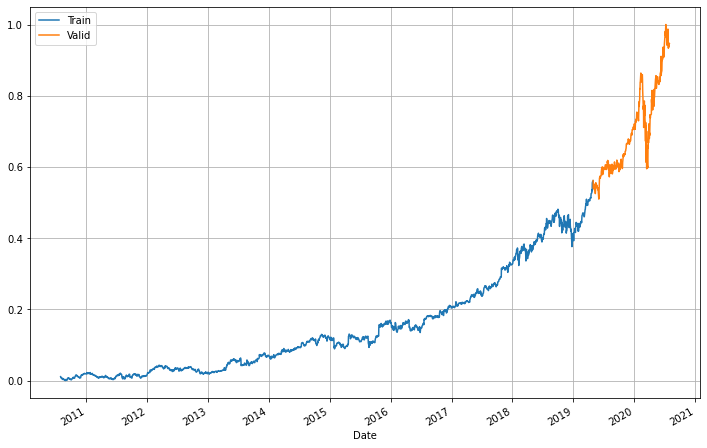

In [583]:
# visualizing-scaled
pd.concat([train['Close_scaled'], val['Close_scaled']], axis = 1).plot(grid = True)
plt.legend(['Train', 'Valid'])
plt.show()

In [725]:
# params
window_size = 30
batch_size = 32

In [726]:
# initialize dataset
dataset = create_dataset(train['Close'], window_size = window_size, 
                         batch_size = batch_size, shuffle_buffer = shuffle_buffer)

In [734]:
# adding more layers - Bidirectional
tf.keras.backend.clear_session()

# create model
model = models.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x, axis = -1), input_shape = [None]),
    layers.Bidirectional(layers.LSTM(128, return_sequences = False)),
    layers.Dropout(0.2),    
    layers.Dense(50, activation = 'relu'),
    layers.Dense(1),
    layers.Lambda(lambda x: x*100)
])

# lr schedule
lr_schedule = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'loss', patience = 5, mode = 'min', verbose = 1, factor = 0.1)

optimizer = tf.keras.optimizers.SGD(lr = 1e-6)
model.compile(loss = 'mse', optimizer = optimizer)
print(model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda (Lambda)              (None, None, 1)           0         
_________________________________________________________________
bidirectional (Bidirectional (None, 256)               133120    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 50)                12850     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
_________________________________________________________________
lambda_1 (Lambda)            (None, 1)                 0         
Total params: 146,021
Trainable params: 146,021
Non-trainable params: 0
__________________________________________________

In [735]:
history = model.fit(dataset, epochs = 200, verbose = 1)

Epoch 1/200
68/68 [==============================] - 0s 6ms/step - loss: 621.6970
Epoch 2/200
68/68 [==============================] - 0s 5ms/step - loss: 209.1773
Epoch 3/200
68/68 [==============================] - 0s 5ms/step - loss: 165.2932
Epoch 4/200
68/68 [==============================] - 0s 6ms/step - loss: 130.1839
Epoch 5/200
68/68 [==============================] - 0s 6ms/step - loss: 115.2152
Epoch 6/200
68/68 [==============================] - 0s 6ms/step - loss: 101.3822
Epoch 7/200
68/68 [==============================] - 0s 5ms/step - loss: 88.0742
Epoch 8/200
68/68 [==============================] - 0s 6ms/step - loss: 77.2180
Epoch 9/200
68/68 [==============================] - 0s 7ms/step - loss: 79.5504
Epoch 10/200
68/68 [==============================] - 1s 9ms/step - loss: 78.3148
Epoch 11/200
68/68 [==============================] - 0s 6ms/step - loss: 64.1998
Epoch 12/200
68/68 [==============================] - 0s 6ms/step - loss: 64.9790
Epoch 13/200
68/68 

68/68 [==============================] - 0s 6ms/step - loss: 15.9423
Epoch 199/200
68/68 [==============================] - 0s 6ms/step - loss: 16.3418
Epoch 200/200
68/68 [==============================] - 0s 6ms/step - loss: 15.8373


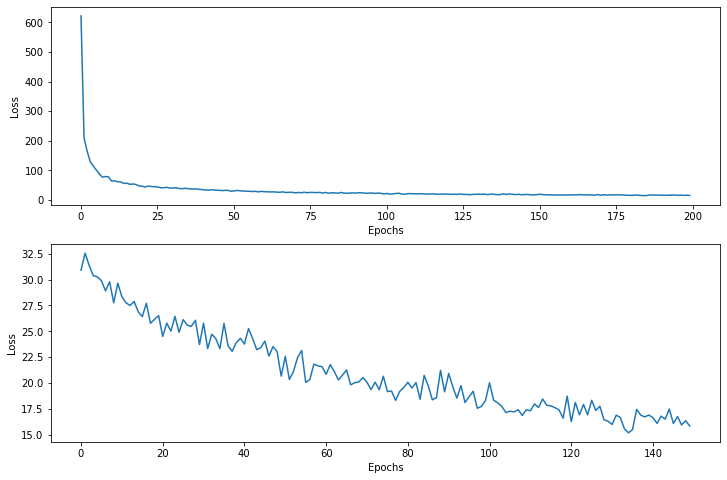

In [736]:
# training loss visualisation
plt.subplot(211)
plt.plot(history.history['loss'], label = 'Train Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')

# zoomed version
plt.subplot(212)
plt.plot(history.history['loss'][50:], label = 'Train Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')

plt.show()

model.predict(val['Close_scaled'][:window_size].values.reshape(-1,1))

In [737]:
forecast = get_forecast(model, hist['Close'].values)
val['forecast_LSTM-64-64-D50'] = forecast 

In [738]:
# metrics
LSTM2B_rmse, LSTM2B_mae = get_metrics(val, 'Close', ['forecast_LSTM-64-64-D50']) 

RMSE for forecast_LSTM-64-64-D50 = 43.88692540194333

MAE for forecast_LSTM-64-64-D50 = 38.645374519997965



# GRU

In [627]:
tf.keras.backend.clear_session()

# initialize dataset
dataset = create_dataset(train['Close'], window_size = window_size, batch_size = batch_size, shuffle_buffer = shuffle_buffer)

# create model
model = models.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x, axis = -1), input_shape = [None]),
    layers.GRU(64),
    layers.Dense(1),
    layers.Lambda(lambda x: x*100)
])

# callbacks to search learning rate
lr_callback = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))


optimizer = tf.keras.optimizers.SGD(learning_rate = 0.01, momentum=0.9)
model.compile(loss = 'mse', optimizer = optimizer)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda (Lambda)              (None, None, 1)           0         
_________________________________________________________________
gru (GRU)                    (None, 64)                12864     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
_________________________________________________________________
lambda_1 (Lambda)            (None, 1)                 0         
Total params: 12,929
Trainable params: 12,929
Non-trainable params: 0
_________________________________________________________________


In [628]:
history = model.fit(dataset, epochs = 100, callbacks = [lr_callback], verbose = 1)

Epoch 1/100
69/69 [==============================] - 1s 9ms/step - loss: 763.6609 - lr: 1.0000e-08
Epoch 2/100
69/69 [==============================] - 1s 10ms/step - loss: 30.2803 - lr: 1.1220e-08
Epoch 3/100
69/69 [==============================] - 1s 10ms/step - loss: 17.5576 - lr: 1.2589e-08
Epoch 4/100
69/69 [==============================] - 1s 11ms/step - loss: 11.8291 - lr: 1.4125e-08
Epoch 5/100
69/69 [==============================] - 1s 11ms/step - loss: 8.3622 - lr: 1.5849e-08
Epoch 6/100
69/69 [==============================] - 1s 10ms/step - loss: 5.9588 - lr: 1.7783e-08
Epoch 7/100
69/69 [==============================] - 1s 10ms/step - loss: 4.4382 - lr: 1.9953e-08
Epoch 8/100
69/69 [==============================] - 1s 10ms/step - loss: 3.6275 - lr: 2.2387e-08
Epoch 9/100
69/69 [==============================] - 1s 8ms/step - loss: 3.1325 - lr: 2.5119e-08
Epoch 10/100
69/69 [==============================] - 1s 12ms/step - loss: 2.7824 - lr: 2.8184e-08
Epoch 11/100
69/

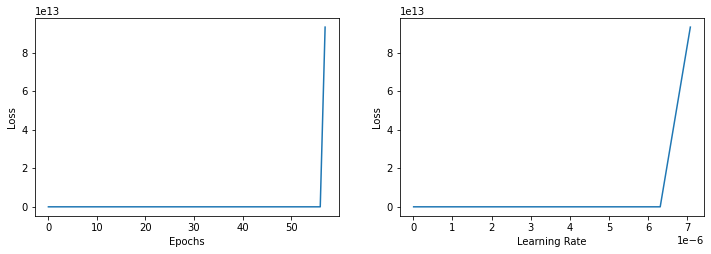

In [629]:
# training loss visualisation
plt.subplot(221)
plt.plot(history.history['loss'], label = 'Train Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')

# plotting learning rate vs loss
plt.subplot(222)
plt.plot(history.history['lr'], history.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')

plt.show()

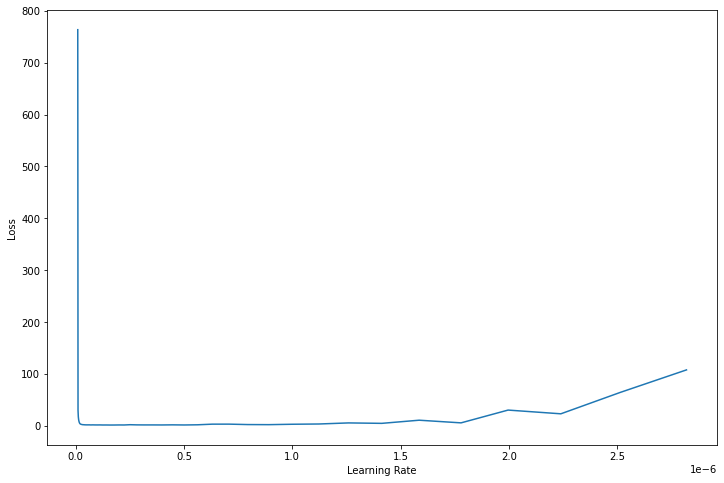

In [630]:
# zoomed in

plt.plot(history.history['lr'][:50], history.history['loss'][:50])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')

plt.show()

In [703]:
# params
window_size = 50
batch_size = 32

In [706]:
tf.keras.backend.clear_session()

# initialize dataset
dataset = create_dataset(train['Close'], window_size = window_size, batch_size = batch_size, shuffle_buffer = shuffle_buffer)

# create model
model = models.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x, axis = -1), input_shape = [None]),
    layers.GRU(128, return_sequences = True),
    layers.Dropout(0.3),
    layers.GRU(64, return_sequences = True),
    layers.Dropout(0.3),
    layers.Dense(50),
    layers.Dense(10),
    layers.Dense(1),
    layers.Lambda(lambda x: x*100)
])



optimizer = tf.keras.optimizers.SGD(learning_rate = 1e-6, momentum=0.9)
model.compile(loss = 'mse', optimizer = optimizer)
history = model.fit(dataset, epochs = 500, verbose = 1)

Epoch 1/500
68/68 [==============================] - 1s 9ms/step - loss: 1598.8124
Epoch 2/500
68/68 [==============================] - 1s 8ms/step - loss: 204.0908
Epoch 3/500
68/68 [==============================] - 1s 8ms/step - loss: 159.3827
Epoch 4/500
68/68 [==============================] - 1s 8ms/step - loss: 128.1628
Epoch 5/500
68/68 [==============================] - 1s 8ms/step - loss: 116.9295
Epoch 6/500
68/68 [==============================] - 1s 8ms/step - loss: 103.5061
Epoch 7/500
68/68 [==============================] - 1s 8ms/step - loss: 89.9039
Epoch 8/500
68/68 [==============================] - 1s 9ms/step - loss: 82.8810
Epoch 9/500
68/68 [==============================] - 1s 8ms/step - loss: 77.8303
Epoch 10/500
68/68 [==============================] - 1s 8ms/step - loss: 76.2997
Epoch 11/500
68/68 [==============================] - 1s 8ms/step - loss: 72.1495
Epoch 12/500
68/68 [==============================] - 1s 8ms/step - loss: 68.4165
Epoch 13/500
68/68

68/68 [==============================] - 1s 10ms/step - loss: 31.2116
Epoch 199/500
68/68 [==============================] - 1s 9ms/step - loss: 31.5129
Epoch 200/500
68/68 [==============================] - 1s 8ms/step - loss: 30.8267
Epoch 201/500
68/68 [==============================] - 1s 8ms/step - loss: 30.8463
Epoch 202/500
68/68 [==============================] - 1s 9ms/step - loss: 31.9666
Epoch 203/500
68/68 [==============================] - 1s 8ms/step - loss: 32.5272
Epoch 204/500
68/68 [==============================] - 1s 9ms/step - loss: 32.1937
Epoch 205/500
68/68 [==============================] - 1s 8ms/step - loss: 31.2221
Epoch 206/500
68/68 [==============================] - 1s 9ms/step - loss: 31.2594
Epoch 207/500
68/68 [==============================] - 1s 10ms/step - loss: 30.7006
Epoch 208/500
68/68 [==============================] - 1s 9ms/step - loss: 31.7928
Epoch 209/500
68/68 [==============================] - 1s 9ms/step - loss: 31.9146
Epoch 210/500
68

68/68 [==============================] - 1s 9ms/step - loss: 25.9803
Epoch 395/500
68/68 [==============================] - 1s 9ms/step - loss: 26.4563
Epoch 396/500
68/68 [==============================] - 1s 9ms/step - loss: 27.6600
Epoch 397/500
68/68 [==============================] - 1s 9ms/step - loss: 27.2210
Epoch 398/500
68/68 [==============================] - 1s 9ms/step - loss: 29.0306
Epoch 399/500
68/68 [==============================] - 1s 9ms/step - loss: 24.8443
Epoch 400/500
68/68 [==============================] - 1s 10ms/step - loss: 26.5822
Epoch 401/500
68/68 [==============================] - 1s 9ms/step - loss: 25.3523
Epoch 402/500
68/68 [==============================] - 1s 9ms/step - loss: 25.0386
Epoch 403/500
68/68 [==============================] - 1s 9ms/step - loss: 26.3924
Epoch 404/500
68/68 [==============================] - 1s 9ms/step - loss: 26.0912
Epoch 405/500
68/68 [==============================] - 1s 10ms/step - loss: 28.1208
Epoch 406/500
68

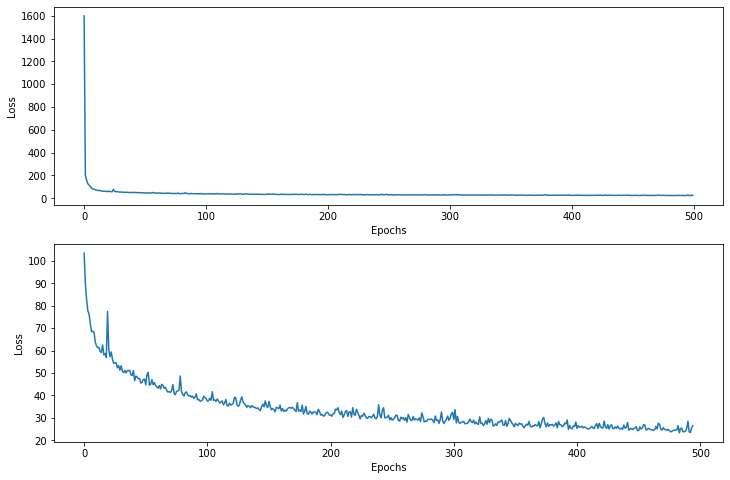

In [707]:
# training loss visualisation
plt.subplot(211)
plt.plot(history.history['loss'], label = 'Train Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')

# zoomed version
plt.subplot(212)
plt.plot(history.history['loss'][5:], label = 'Train Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')

plt.show()

In [708]:
forecast = get_forecast(model, hist['Close'].values)
val['GRU'] = forecast 

In [709]:
get_metrics(val, 'Close', ['GRU'])

RMSE for GRU = 67.43967415224375

MAE for GRU = 63.37175194099499



({'GRU': 67.43967415224375}, {'GRU': 63.37175194099499})

# Convolutions

In [799]:
tf.keras.backend.clear_session()

# initialize dataset
dataset = create_dataset(train['Close'], window_size = window_size, batch_size = batch_size, shuffle_buffer = shuffle_buffer)

# create model
model = models.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x, axis = -1), input_shape = [None]),
    layers.Conv1D(32, kernel_size = 5, activation = 'relu', padding = 'causal', input_shape = [None, 1]),
    layers.Dense(50, activation = 'relu'),
    layers.Dense(50, activation = 'relu'),
    layers.Dense(1)
    
])

# callbacks
lr_callback = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))



optimizer = tf.keras.optimizers.SGD(learning_rate = 0.01, momentum = 0.9)
model.compile(loss = 'mse', optimizer = optimizer)


history = model.fit(dataset, epochs = 100, verbose = 1, shuffle = False, callbacks = [lr_callback])

Epoch 1/100
68/68 [==============================] - 0s 4ms/step - loss: 2627.4475 - lr: 1.0000e-08
Epoch 2/100
68/68 [==============================] - 0s 6ms/step - loss: 2378.0930 - lr: 1.1220e-08
Epoch 3/100
68/68 [==============================] - 0s 6ms/step - loss: 2074.8037 - lr: 1.2589e-08
Epoch 4/100
68/68 [==============================] - 0s 5ms/step - loss: 1743.8615 - lr: 1.4125e-08
Epoch 5/100
68/68 [==============================] - 0s 4ms/step - loss: 1388.6365 - lr: 1.5849e-08
Epoch 6/100
68/68 [==============================] - 0s 4ms/step - loss: 997.1229 - lr: 1.7783e-08
Epoch 7/100
68/68 [==============================] - 0s 5ms/step - loss: 612.1596 - lr: 1.9953e-08
Epoch 8/100
68/68 [==============================] - 0s 4ms/step - loss: 295.9055 - lr: 2.2387e-08
Epoch 9/100
68/68 [==============================] - ETA: 0s - loss: 130.015 - 0s 4ms/step - loss: 129.8015 - lr: 2.5119e-08
Epoch 10/100
68/68 [==============================] - 0s 4ms/step - loss: 77.5

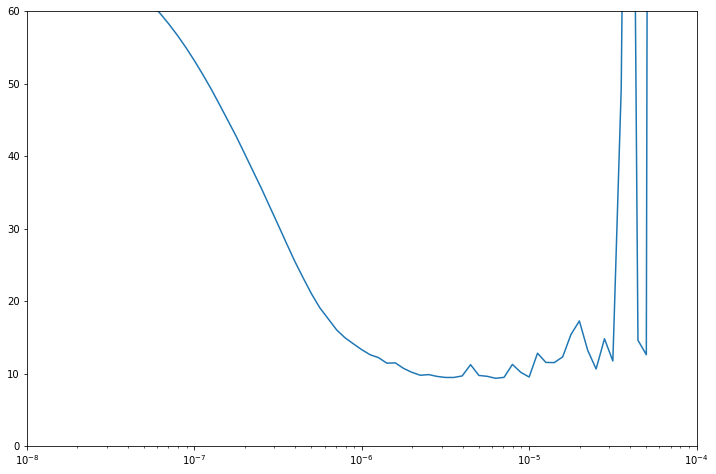

In [801]:
plt.semilogx(history.history['lr'], history.history['loss'])
plt.axis([1e-8, 1e-4, 0, 60])
plt.show()

In [808]:
# init params
window_size = 30
batch_size = 32

In [817]:
tf.keras.backend.clear_session()

# initialize dataset
dataset = create_dataset(train['Close'], window_size = window_size, batch_size = batch_size, shuffle_buffer = shuffle_buffer)

# create model
model = models.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x, axis = -1), input_shape = [None]),
    layers.Conv1D(32, kernel_size = 5, activation = 'relu', padding = 'causal', input_shape = [None, 1]),
    layers.Dense(50, activation = 'relu'),
    layers.Dropout(0.3),
    layers.Dense(50, activation = 'relu'),
    layers.Dense(1)
    
])


optimizer = tf.keras.optimizers.SGD(learning_rate = 5e-6, momentum = 0.9)
model.compile(loss = 'mse', optimizer = optimizer)


history = model.fit(dataset, epochs = 200, verbose = 1, shuffle = False)

Epoch 1/200
68/68 [==============================] - 0s 4ms/step - loss: 329.0517
Epoch 2/200
68/68 [==============================] - 0s 4ms/step - loss: 76.2169
Epoch 3/200
68/68 [==============================] - 0s 4ms/step - loss: 57.1794
Epoch 4/200
68/68 [==============================] - 0s 4ms/step - loss: 42.8192
Epoch 5/200
68/68 [==============================] - 0s 4ms/step - loss: 34.8212
Epoch 6/200
68/68 [==============================] - 0s 4ms/step - loss: 30.0685
Epoch 7/200
68/68 [==============================] - 0s 4ms/step - loss: 24.7849
Epoch 8/200
68/68 [==============================] - 0s 4ms/step - loss: 21.9882
Epoch 9/200
68/68 [==============================] - 0s 4ms/step - loss: 19.8065
Epoch 10/200
68/68 [==============================] - 0s 4ms/step - loss: 18.0857
Epoch 11/200
68/68 [==============================] - 0s 4ms/step - loss: 16.8572
Epoch 12/200
68/68 [==============================] - 0s 4ms/step - loss: 15.6580
Epoch 13/200
68/68 [====

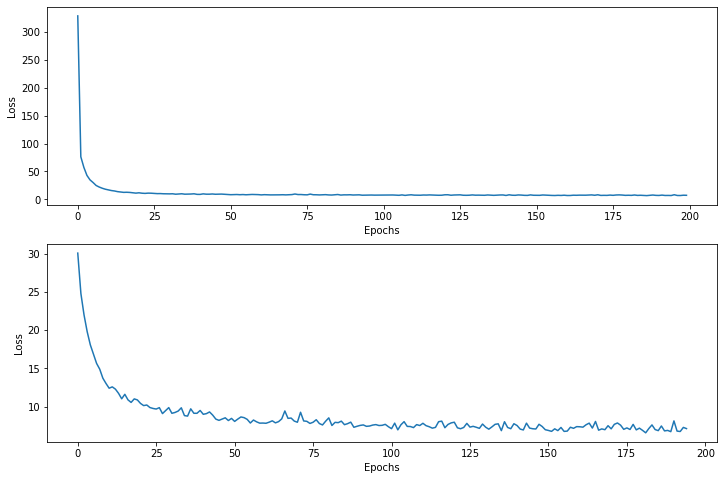

In [818]:
# training loss visualisation
plt.subplot(211)
plt.plot(history.history['loss'], label = 'Train Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')

# zoomed version
plt.subplot(212)
plt.plot(history.history['loss'][5:], label = 'Train Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')

plt.show()

In [819]:
forecast = get_forecast(model, hist['Close'].values)
val['Conv'] = forecast 

In [820]:
get_metrics(val, 'Close', ['Conv'])

RMSE for Conv = 51.4279835342182

MAE for Conv = 49.317479749613376



({'Conv': 51.4279835342182}, {'Conv': 49.317479749613376})

# Convolution + LSTM

In [839]:
tf.keras.backend.clear_session()

# initialize dataset
dataset = create_dataset(train['Close'], window_size = window_size, batch_size = batch_size, shuffle_buffer = shuffle_buffer)

# create model
model = models.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x, axis = -1), input_shape = [None]),
    layers.Conv1D(64, kernel_size = 5, activation = 'relu', padding = 'causal', input_shape = [None, 1]),
    layers.LSTM(64, return_sequences = True),
    layers.LSTM(64),
    layers.Dropout(0.2),
    layers.Dense(50, activation = 'relu'),
    layers.Dense(50, activation = 'relu'),
    layers.Dense(1),
    layers.Lambda(lambda x: x*100)
    
])


# callbacks
lr_callback = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))



optimizer = tf.keras.optimizers.SGD(learning_rate = 0.01, momentum = 0.9)
model.compile(loss = 'mse', optimizer = optimizer)


history = model.fit(dataset, epochs = 100, verbose = 1, shuffle = False, callbacks = [lr_callback])

Epoch 1/100
68/68 [==============================] - 0s 6ms/step - loss: 1103.7758 - lr: 1.0000e-08
Epoch 2/100
68/68 [==============================] - 0s 6ms/step - loss: 518.9106 - lr: 1.1220e-08
Epoch 3/100
68/68 [==============================] - 0s 6ms/step - loss: 428.7233 - lr: 1.2589e-08
Epoch 4/100
68/68 [==============================] - 0s 6ms/step - loss: 313.9836 - lr: 1.4125e-08
Epoch 5/100
68/68 [==============================] - 0s 6ms/step - loss: 255.7103 - lr: 1.5849e-08
Epoch 6/100
68/68 [==============================] - 0s 6ms/step - loss: 322.1973 - lr: 1.7783e-08
Epoch 7/100
68/68 [==============================] - 0s 6ms/step - loss: 257.2925 - lr: 1.9953e-08
Epoch 8/100
68/68 [==============================] - 0s 6ms/step - loss: 157.6036 - lr: 2.2387e-08
Epoch 9/100
68/68 [==============================] - 0s 6ms/step - loss: 126.3952 - lr: 2.5119e-08
Epoch 10/100
68/68 [==============================] - 0s 6ms/step - loss: 96.2126 - lr: 2.8184e-08
Epoch 11/

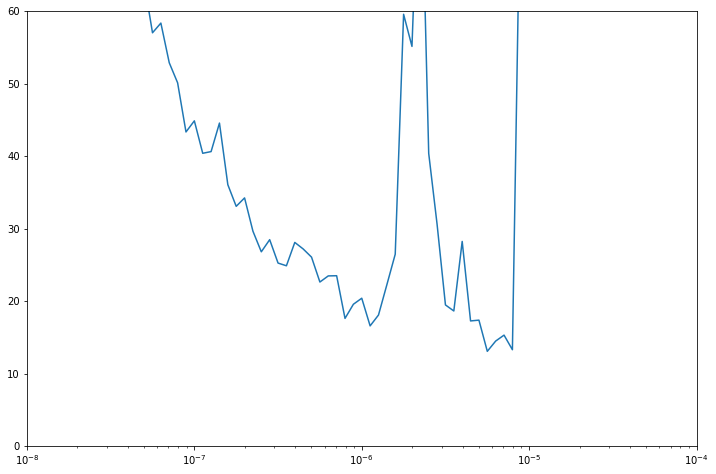

In [840]:
plt.semilogx(history.history['lr'], history.history['loss'])
plt.axis([1e-8, 1e-4, 0, 60])
plt.show()

In [19]:
# params
window_size = 100
batch_size = 32
shuffle_buffer = 1000

In [20]:
tf.keras.backend.clear_session()

# initialize dataset
dataset = create_dataset(train['Close'], window_size = window_size, batch_size = batch_size, shuffle_buffer = shuffle_buffer)

# create model
model = models.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x, axis = -1), input_shape = [None]),
    layers.Conv1D(64, kernel_size = 5, activation = 'relu', padding = 'causal', input_shape = [None, 1]),
    layers.LSTM(64, return_sequences = True),
    layers.LSTM(64),
    layers.Dropout(0.5),
    layers.Dense(50, activation = 'relu'),
    layers.Dense(50, activation = 'relu'),
    layers.Dense(1),
    layers.Lambda(lambda x: x*100)
    
])


optimizer = tf.keras.optimizers.SGD(learning_rate = 1e-6, momentum = 0.9)
model.compile(loss = 'mse', optimizer = optimizer)


history = model.fit(dataset, epochs = 100, verbose = 1, shuffle = False)

Epoch 1/100
66/66 [==============================] - 2s 27ms/step - loss: 332.4226
Epoch 2/100
66/66 [==============================] - 1s 9ms/step - loss: 236.2758
Epoch 3/100
66/66 [==============================] - 1s 10ms/step - loss: 365.7062
Epoch 4/100
66/66 [==============================] - 1s 10ms/step - loss: 113.2626
Epoch 5/100
66/66 [==============================] - 1s 9ms/step - loss: 101.6094
Epoch 6/100
66/66 [==============================] - 1s 9ms/step - loss: 82.0158
Epoch 7/100
66/66 [==============================] - 1s 10ms/step - loss: 78.3776
Epoch 8/100
66/66 [==============================] - 1s 9ms/step - loss: 60.1120
Epoch 9/100
66/66 [==============================] - 1s 9ms/step - loss: 60.1701
Epoch 10/100
66/66 [==============================] - 1s 10ms/step - loss: 48.7815
Epoch 11/100
66/66 [==============================] - 1s 11ms/step - loss: 51.3824
Epoch 12/100
66/66 [==============================] - 1s 12ms/step - loss: 62.5836
Epoch 13/100


66/66 [==============================] - 1s 9ms/step - loss: 16.9511


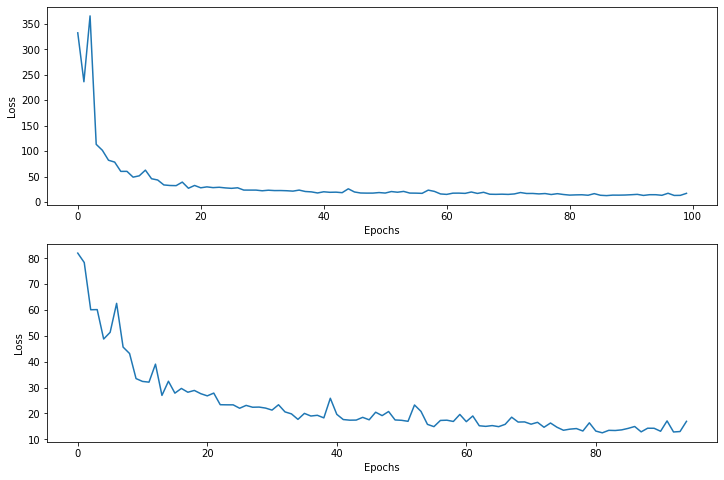

In [21]:
# training loss visualisation
plt.subplot(211)
plt.plot(history.history['loss'], label = 'Train Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')

# zoomed version
plt.subplot(212)
plt.plot(history.history['loss'][5:], label = 'Train Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')

plt.show()

In [22]:
forecast = get_forecast(model, hist['Close'].values)
val['Conv+LSTM'] = forecast 

In [23]:
get_metrics(val, ['Close'], ['Conv+LSTM'])

RMSE for Conv+LSTM = 43.84533306775566

MAE for Conv+LSTM = 38.7285508289999



({'Conv+LSTM': 43.84533306775566}, {'Conv+LSTM': 38.7285508289999})